In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [140]:
df = df.drop(df.iloc[:,12:], axis = 1)

In [141]:
df = df.drop('status_id', axis = 1)

In [142]:
type(df["status_published"][0])

str

In [143]:
print('Valores duplicados:', df.duplicated().value_counts())

Valores duplicados: False    6996
True       54
dtype: int64


In [144]:
df = df.drop_duplicates()

In [145]:
df = df.reset_index()


In [146]:
df.drop("index", axis = 1, inplace=True)

In [147]:
df

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
5,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
6,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
7,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
8,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0
9,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0


In [148]:
print('Valores faltantes:', df.isnull().sum())

Valores faltantes: status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64


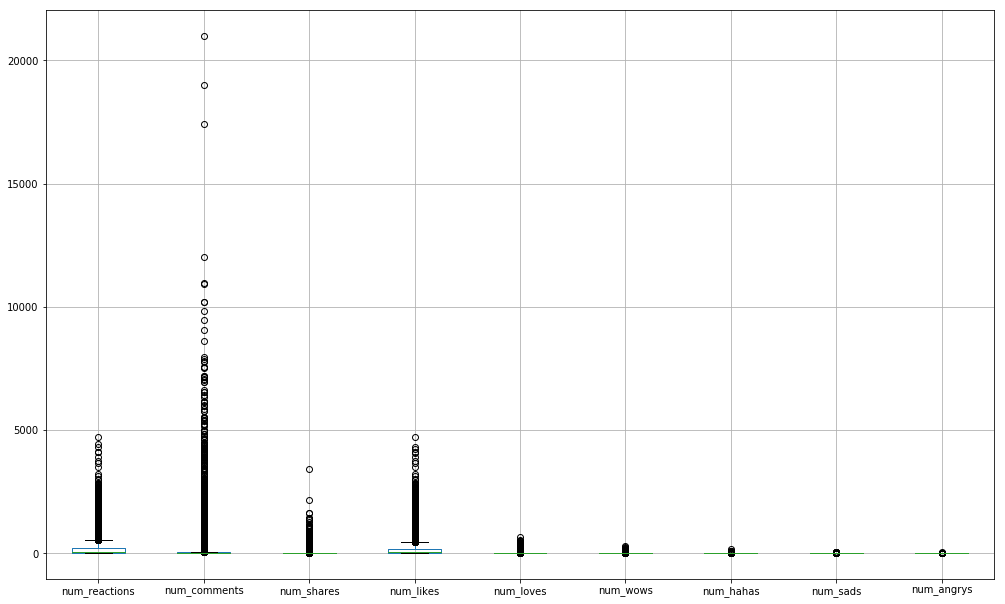

In [149]:
x_size = 17
y_size = x_size * (8/13)
plt.figure(figsize=(x_size, y_size))
# Aumentar o tamanho do plot na proporção 8/13
df.boxplot()

In [150]:
df['num_comments'].nlargest(10)

498     20990
480     19013
6703    17404
3246    12003
6708    10960
6745    10926
6605    10194
6394    10186
6721     9831
3890     9452
Name: num_comments, dtype: int64

In [151]:
df.drop([498, 480, 6703, 3246], axis = 0 ,inplace = True)

In [152]:
df = df.reset_index()
df.drop("index", axis = 1, inplace=True)

In [153]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [154]:
from sklearn.preprocessing import LabelEncoder

status_type = LabelEncoder().fit_transform(df['status_type'])
df['status_type'] = status_type

In [155]:
df.drop("status_published", axis = 1, inplace = True)

In [156]:
x = df

# Hierárquico single linkage

### O single linkage utiliza a menor das distâncias existentes entre dois clusters no processo de concatenação de clusters. 

### n_cluster = 5

In [157]:
from sklearn.cluster import AgglomerativeClustering

In [158]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

### Resultado

In [159]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6988
1,1
2,1
3,1
4,1


### n_cluster = 3

In [160]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

### Resultado

In [161]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6990
1,1
2,1


### n_cluster = 10

In [162]:
hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

### Resultado

In [171]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6979
1,3
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,1


### n_cluster = 15

In [258]:
hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)

### Resultado

In [259]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6975
1,2
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,1


# Hierárquico complete linkage

### O complete linkage a diferença é que este algoritmo utiliza a maior das distâncias existentes durante o processo de concatenação de clusters. 

### n_cluster = 5

In [260]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

### Resultado

In [261]:

a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6635
1,180
2,126
3,43
4,8


### n_cluster = 3

In [240]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

### Resultado

In [241]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6815
1,126
2,51


### n_cluster = 4

In [242]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

### Resultado

In [243]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6815
1,126
2,43
3,8


### n_cluster = 5

In [245]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)

### Resultado

In [246]:
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6635
1,180
2,126
3,43
4,8


In [251]:
hc = AgglomerativeClustering(n_clusters = 20, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,5742
1,564
2,255
3,117
4,74
5,63
6,41
7,36
8,18
9,15


### Análise dos resultados do algoritmo Hierárquico

# K-Means

### K = 2

In [48]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state= 15).fit(x)

In [49]:
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])


,Nº Instancias
0,6829
1,163


### K = 3

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state= 15).fit(x)

In [51]:
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6373
1,471
2,148


### K = 5

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=15).fit(x)

In [53]:
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6020
1,427
2,399
3,110
4,36


### K = 10

In [55]:
kmeans = KMeans(n_clusters=10, random_state= 15).fit(x)
a = pd.DataFrame(kmeans.labels_)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4831
1,825
2,543
3,237
4,185
5,159
6,86
7,78
8,40
9,8


### Análise dos resultados do K-Means

## Normalizando base

In [56]:
# Foi utilizada a seguinte função para normalizar os dados
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [57]:
df = normalize(df)

In [58]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.046715,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.021533,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [62]:
x = df;

## Executando Hierárquico com base normalizada

### Single Linkage

In [63]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6988
1,1
2,1
3,1
4,1


In [64]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,6982
1,2
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


### Complete Linkage

In [65]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4293
1,2564
2,99
3,21
4,15


In [66]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4284
1,2500
2,99
3,64
4,18
5,15
6,7
7,2
8,2
9,1


In [67]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 15, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(x)
a = pd.DataFrame(y_hc)
lista = list(a[0].value_counts())
pd.DataFrame(lista, columns=["Nº Instancias"])

,Nº Instancias
0,4050
1,2436
2,234
3,98
4,64
5,63
6,15
7,15
8,7
9,3


# <center> Comparando Resultados </center>

## <center> Hierárquico Single Linkage </center>

                                         Não normalizado   Normalizado
K = 3|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6990|		6990
|1	|1|		1
|2	|1|		1


K = 5|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6988|		6988
|1	|1|		1
|2	|1|		1
|3	|1|		1
|4	|1|		1

K = 10|Número de Clusters | Número de Instâncias | Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6979|		6982
|1	|3|		2
|2	|2|		1
|3	|2|		1
|4	|1|		1
|5	|1|		1
|6	|1|		1
|7	|1|		1
|8	|1|		1
|9	|1|  	1

## <center> Hierárquico Completed Linkage </center>

                                         Não normalizado   Normalizado
K = 3|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6815|		6956
|1	|126|		21
|2	|51|		15



K = 4|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6815|		4293
|1	|126|		2663
|2	|43|		21
|3	|8|		15




K = 5|Número de Clusters | Número de Instâncias |  Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6635|		4293
|1	|180|		2564
|2	|126|		99
|3	|43|		21
|4	|8|		15

K = 10|Número de Clusters | Número de Instâncias | Número de Instâncias 
:--------- |:---------: | :------: | -------:
|0	|6306|		4284
|1	|329|		2500
|2	|130|		99
|3	|117|		64
|4	|48|		18
|5	|28|		15
|6	|15|		7
|7	|9|		2
|8	|8|		2
|9	|2|  	1

## <center> K-Means </center>

Text(0,0.5,'Euclidian Distances')

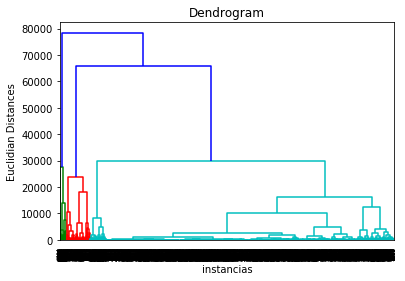

In [267]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendrogram")
plt.xlabel("instancias")
plt.ylabel('Euclidian Distances')

Text(0,0.5,'Euclidian Distances')

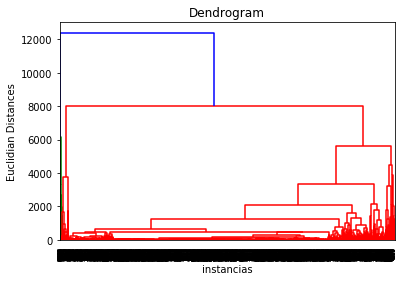

In [268]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'complete'))
plt.title("Dendrogram")
plt.xlabel("instancias")
plt.ylabel('Euclidian Distances')